# 1. Introduction


| # | Details |
| --- | --- |
| Name | Marwan Musa |
| Dataset | ml_datasets : credit_card_default (on BigQuery Public Dataset) |
| Objective | Constructing **Classification Model** to predict `default_payment_next_month` |

## Query Google Cloud Platform

```sql
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 23928;

# 2. Import Libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

# For Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline


# Split Dataset and Standarize the Datasets
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Evaluate Models
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# 3. Data Loading

In [102]:
# Data Loading & Data Head
data = pd.read_csv('credit_card_default.csv')
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [103]:
# Data Tail

data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Copy data original

data_copy = data.copy()

# 4. Exploratory Data Analysis

### 4a. Check Data Shape (Num of Rows and Columns)

In [105]:
# Check data shape

data.shape

(2965, 24)

There are 2965 rows and 24 columns in the data. One of these 24 columns will be used as a target column for analysis with machine learning later.

### 4b. Check each data type of columns and missing values

In [106]:
# Check Dataset columns type and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Here as we can see that there are 2965 RangeIndex. For the data type, we only have integer here.

### 4c. Summary Statistics

In [107]:
# Stat Descriptive of Data

data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


### 4d. Check value counts for a specific column

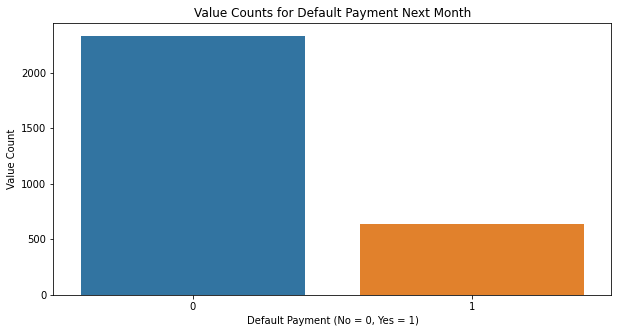

In [108]:
# Value counts for days

a = data['default_payment_next_month'].value_counts()

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = a.index, y = a, ax=ax)
plt.title("Value Counts for Default Payment Next Month")
plt.xlabel("Default Payment (No = 0, Yes = 1)")
plt.ylabel("Value Count")
plt.show(fig)

As it can be seen that `no default` class of costumers is more than quadrupled compared to `default` class of costumers.

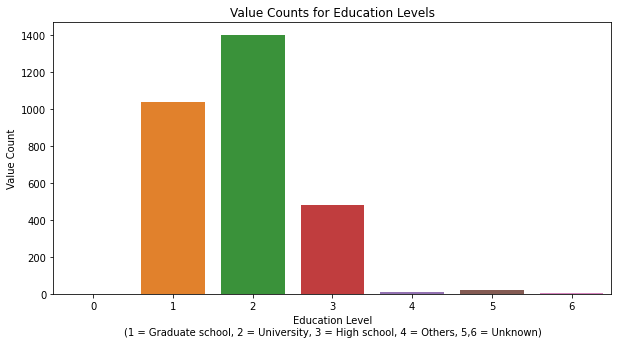

In [109]:
# Value counts for Education Levels

b = data['education_level'].value_counts()

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = b.index, y = b, ax=ax)
plt.title("Value Counts for Education Levels")
plt.xlabel("Education Level\n(1 = Graduate school, 2 = University, 3 = High school, 4 = Others, 5,6 = Unknown)")
plt.ylabel("Value Count")
plt.show(fig)

By education level, we can see that University grads are the most credit card holder. 

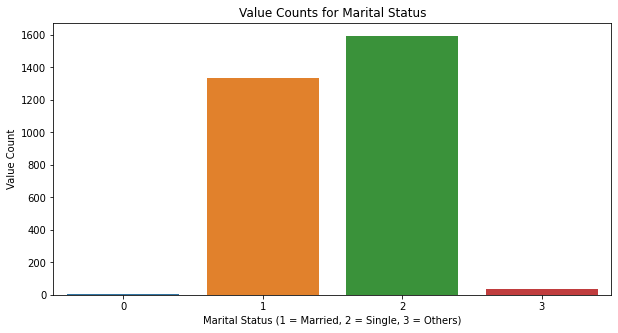

In [110]:
# Value counts for marital Status

c = data['marital_status'].value_counts()

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = c.index, y = c, ax=ax)
plt.title("Value Counts for Marital Status")
plt.xlabel("Marital Status (1 = Married, 2 = Single, 3 = Others)")
plt.ylabel("Value Count")
plt.show(fig)

From the data above we can conclude that there are so many credit card holder are single.

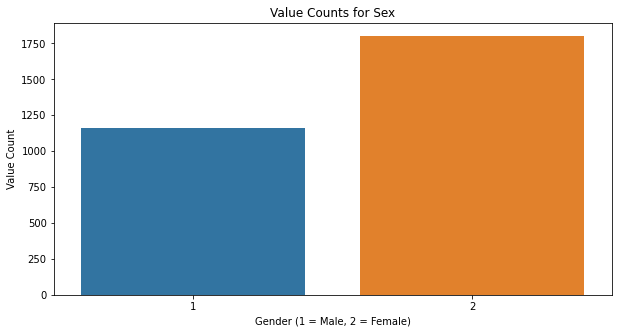

In [111]:
# Value counts for sex

d = data['sex'].value_counts()

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = d.index, y = d, ax=ax)
plt.title("Value Counts for Sex")
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Value Count")
plt.show(fig)

There are so many credit card holder female than male based on the data.

### 4e. See the Data Distribution and Data Anomaly

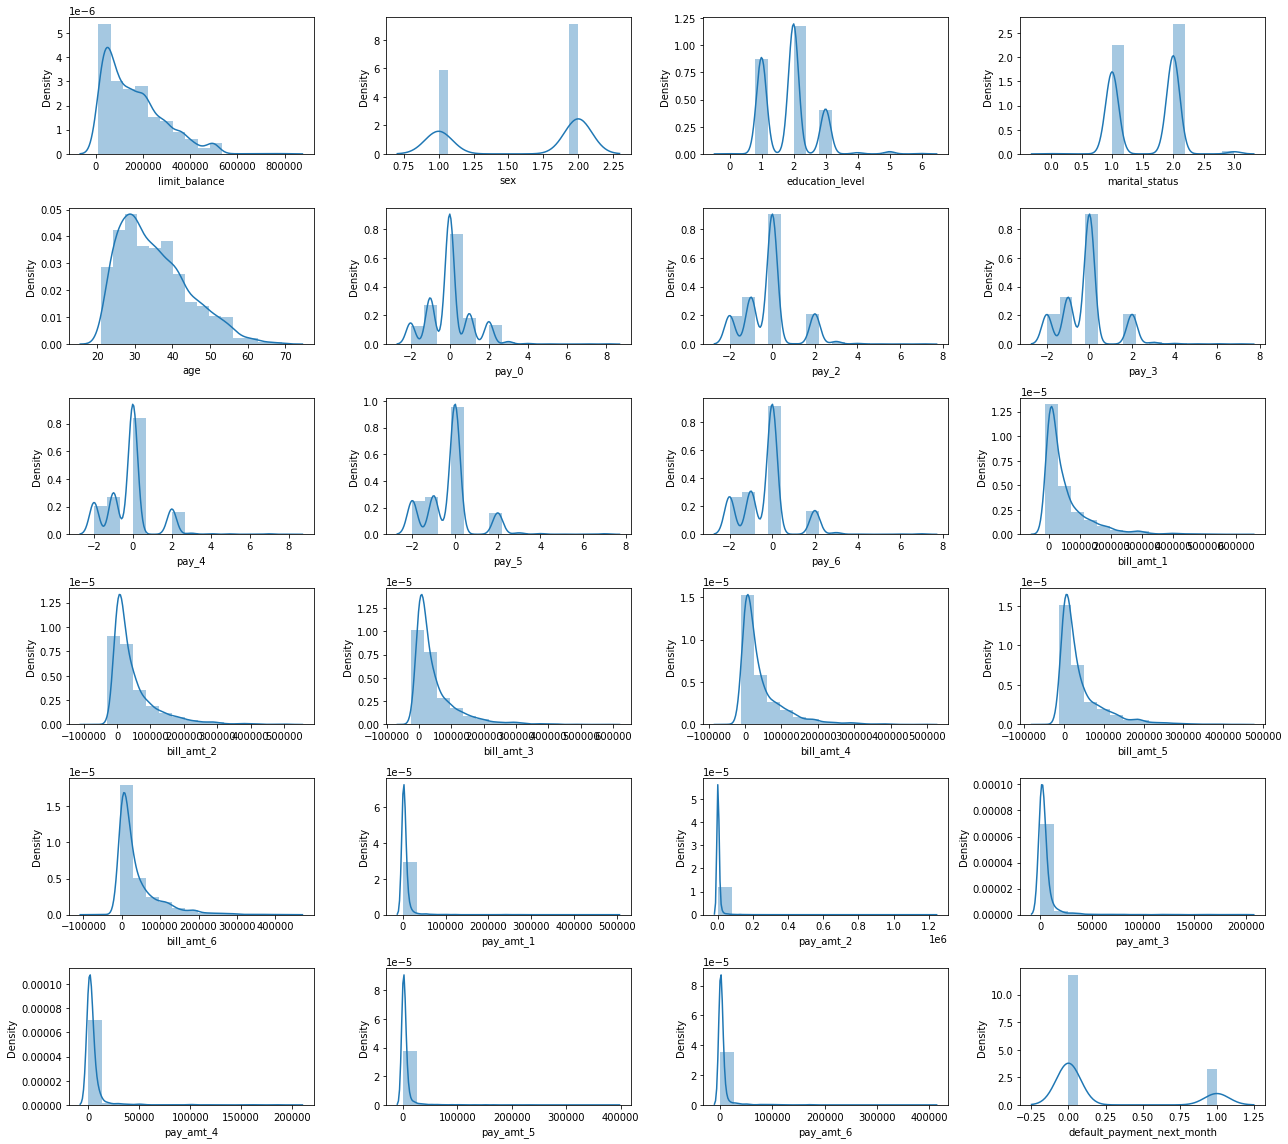

In [112]:
# Numerical columns as a variable
data_num_columns = data.select_dtypes(exclude=['object'])

# Visualizing data distribution with distplot 
x = plt.figure(figsize=(18, 16))

for i, j in enumerate(data_num_columns):
    x.add_subplot(6, 4, i+1)
    sns.distplot(data[j], bins=15)
    x.tight_layout()

plt.tight_layout()

It can be seen from above displots that all features are distributed non-normally. However, these all features are divided into two categories that are numerical features and categorical features in numeric form. If we refer to this [references](http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html), then the numerical features are `limit_balance`, `age`, `bill_amt_1` to `bill_amt_6`, `pay_amt_1` to `pay_amt_6` and the rest are categorical features.

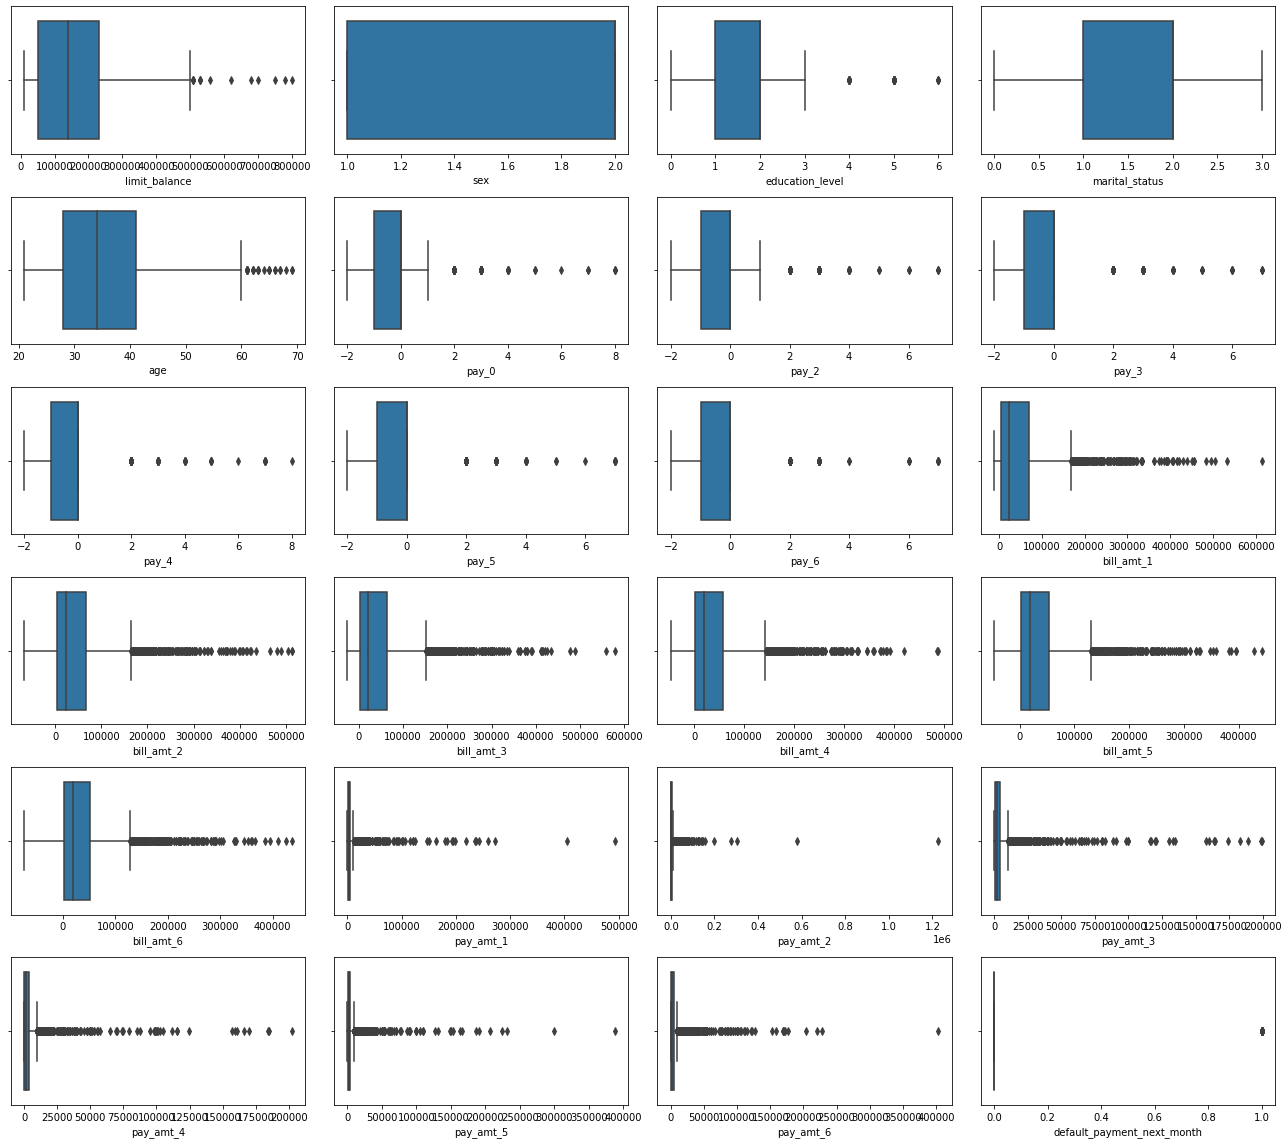

In [113]:
# Visualizing data distribution with boxplot // checking outliers

x = plt.figure(figsize=(18, 16))

for i, j in enumerate(data_num_columns):
    x.add_subplot(6, 4, i+1)
    sns.boxplot(data[j])
    x.tight_layout()

plt.tight_layout()

All the data above shows that there are outliers, we will handle those outliers later in data preprocessing section.

### 4f. Check the Correlation between Variables in the Data

As mentioned before in our objective, that we will build a classification model to predict a `default_payment_next_month`. Then, we will look at the variables that has the most correlation with this variable by heatmap correlation.

Text(0.5, 1.0, 'Features Correlating with Next Month Default Payment')

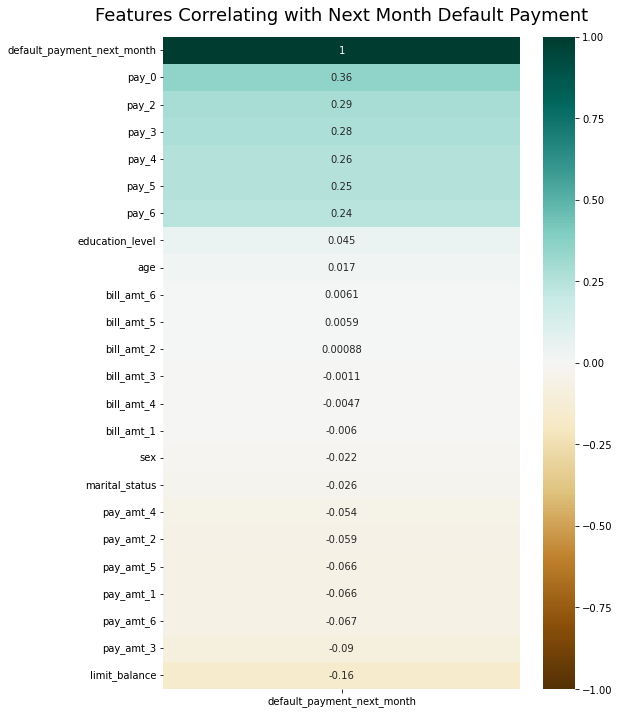

In [114]:
# Feature correlating with Default Payment

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['default_payment_next_month']].sort_values(by='default_payment_next_month', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Next Month Default Payment', fontdict={'fontsize':18}, pad=16)

By heatmap correlation, `pay_0` to `pay_6` are significantly correlating to `default_payment_next_month` feature.

#### *Univariate Analysis*

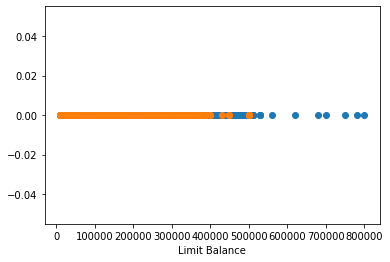

In [115]:
# Default Payment Classification by Limit Balance

data_morethan50 = data.loc[data['default_payment_next_month']== 0]
data_lessthan50 = data.loc[data['default_payment_next_month']== 1]

plt.plot(data_morethan50['limit_balance'],np.zeros_like(data_morethan50['limit_balance']),'o')
plt.plot(data_lessthan50['limit_balance'],np.zeros_like(data_lessthan50['limit_balance']),'o')
plt.xlabel('Limit Balance')
plt.show()

As it shown above, the higher the limit balance of cc holder, the higher the probability of they will not default in next month payment and the minimum of limit balance that holder should have in order to not default next month payment is 400000.

#### *Bivariate Analysis*

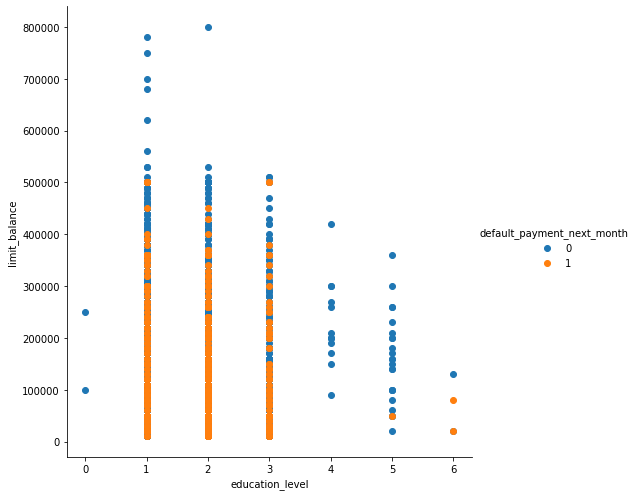

In [116]:
# Default Payment Classification by Limit Balance with Education Level

sns.FacetGrid(data,hue="default_payment_next_month",size=7).map(plt.scatter,"education_level","limit_balance").add_legend();
plt.show()

Classifying default payment with correlation between education level and limit balance.

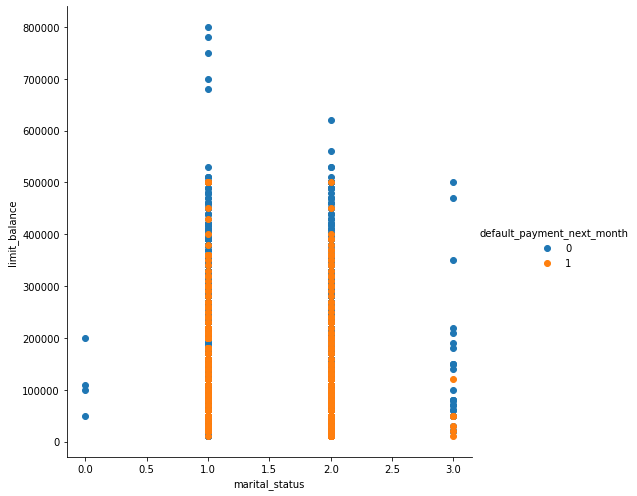

In [117]:
# Income Bracket Classification by Capital Gain with Marital Status

sns.FacetGrid(data,hue="default_payment_next_month",size=7).map(plt.scatter,"marital_status","limit_balance").add_legend();
plt.show()

Classifying default payment with correlation between marital status and limit balance

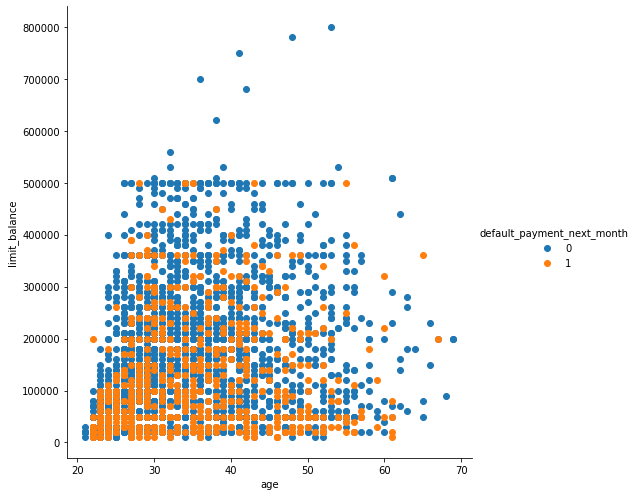

In [118]:
# Income Bracket Classification by Capital Gain with Age

sns.FacetGrid(data,hue="default_payment_next_month",size=7).map(plt.scatter,"age","limit_balance").add_legend();
plt.show()

Classifying default payment with correlation between age and limit balance

# 5. Data Preprocessing

## *Get Data for Model Inference*

In [119]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=0)

In [120]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

In [121]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## *Splitting Dataset*

In [122]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']

In [123]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

train Size :  (2364, 23)
Test Size :  (591, 23)


## *Feature Selection*

To choose the best features for our model we will do selection by feature importance.

### Feature Importances

In [124]:
# A random forest classifier will be fitted to compute the feature importances.

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [125]:
# Feature importances are provided by the fitted attribute feature_importances_ 
# and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.033 seconds


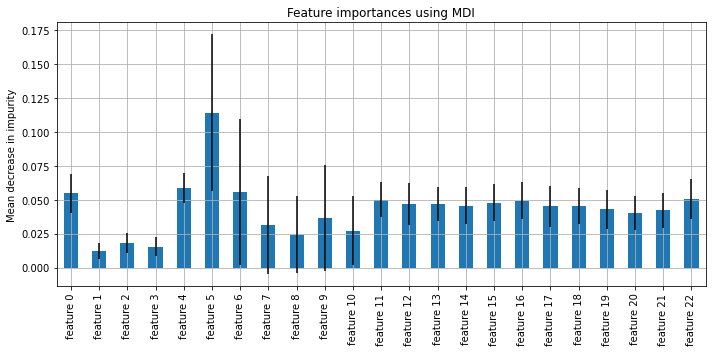

In [126]:
# Let’s plot the impurity-based importance.

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.grid(True)
fig.tight_layout()

In [127]:
# Top 5 important features

forest_importances.sort_values(ascending=False).head(5).index

Index(['feature 5', 'feature 4', 'feature 6', 'feature 0', 'feature 22'], dtype='object')

In [128]:
#  Columns of top important features

data.columns[[5,4,6,0,22]]

Index(['pay_0', 'age', 'pay_2', 'limit_balance', 'pay_amt_6'], dtype='object')

To avoid multicorrelation, we will check the correlation between `top 5 important features`

Text(0.5, 1.0, 'Features Correlating with pay_0')

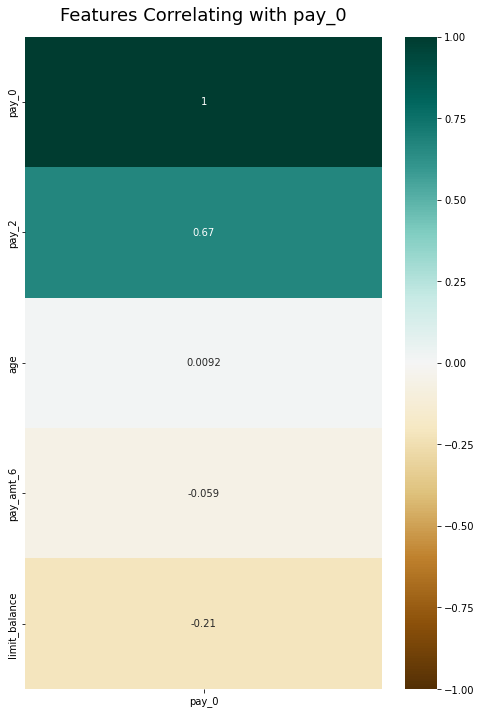

In [129]:
# Feature correlating between the top 5 features.

top_5 = X_train[['pay_0', 'age', 'pay_2', 'limit_balance', 'pay_amt_6']]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(top_5.corr()[['pay_0']].sort_values(by='pay_0', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pay_0', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with age')

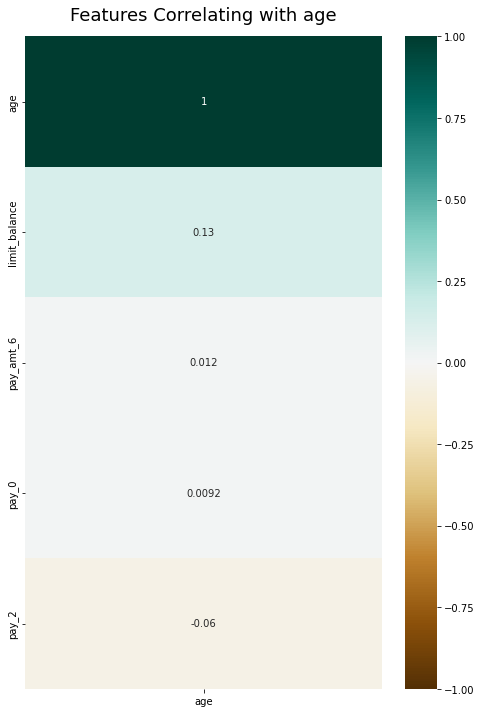

In [130]:
# Feature correlating between the top 5 features.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(top_5.corr()[['age']].sort_values(by='age', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with age', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with pay_2')

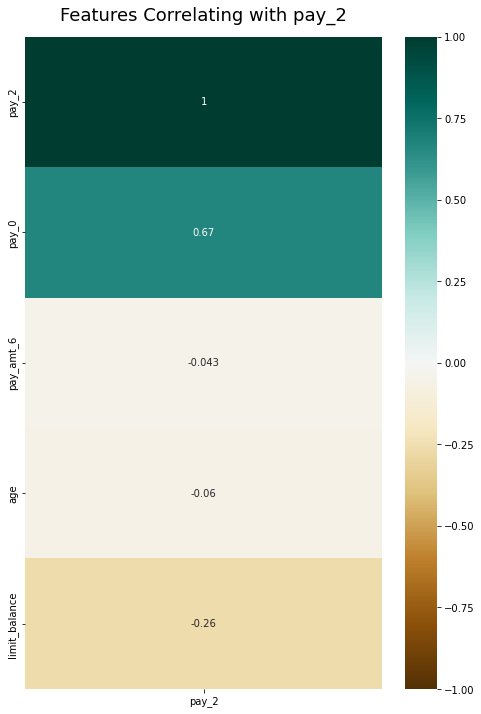

In [131]:
# Feature correlating between the top 5 features.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(top_5.corr()[['pay_2']].sort_values(by='pay_2', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pay_2', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with limit_balance')

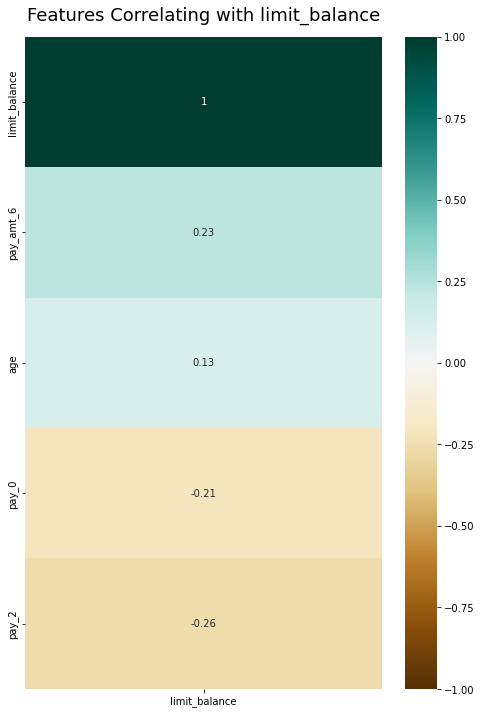

In [132]:
# Feature correlating between the top 5 features.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(top_5.corr()[['limit_balance']].sort_values(by='limit_balance', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with limit_balance', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with pay_amt_6')

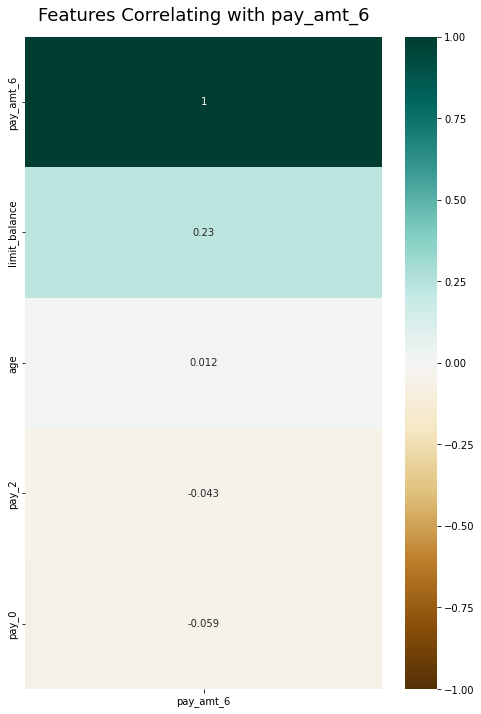

In [133]:
# Feature correlating between the top 5 features.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(top_5.corr()[['pay_amt_6']].sort_values(by='pay_amt_6', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pay_amt_6', fontdict={'fontsize':18}, pad=16)

After checking variable correlation between top 5 features, the correlation between `pay_0` and `pay_2` is relatively high, then we will only use `pay_0` or `pay_2` for our model. Therefore,

- by top important features, we have `pay_0`, `age`, `limit_balance`, `pay_amt_6`
- by correlation map on EDA, we have `pay_0` to `pay_6` that are significantly correlating to `default_payment_next_month` feature.

If we merge the top important features and the most correlating features with `default_payment_next_month`, we have `pay_0`, `pay_3`, `pay_4`, `pay_5`, `pay_6`, `age`, `limit_balance`, and `pay_amt_6` as our selected features.

In [134]:
# Initialize X_train with selected features

X_train = X_train[['pay_0', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'age', 'limit_balance', 'pay_amt_6']]
X_test = X_test[['pay_0', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'age', 'limit_balance', 'pay_amt_6']]

## *Handling Missing Values*

In [135]:
# Check Missing Values on X_train

X_train.isnull().sum()

pay_0            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
age              0
limit_balance    0
pay_amt_6        0
dtype: int64

In [136]:
# Check Missing Values on X_test

X_test.isnull().sum()

pay_0            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
age              0
limit_balance    0
pay_amt_6        0
dtype: int64

In [137]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [138]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

## *Handling Outlier*

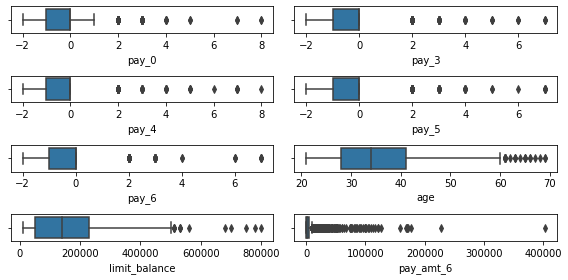

In [139]:
# Boxploting every feature on X_train to see outlier (Before Handling)
x = plt.figure(figsize=(8, 4))

for i, j in enumerate(X_train.columns):
    x.add_subplot(4, 2, i+1)
    sns.boxplot(X_train[j])
    x.tight_layout()
    
plt.tight_layout()

In [140]:
# Check if the data have normal distribution for each numerical column on X_train
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

normaldist_columns = []
nonnormaldist_columns = []

for i in X_train.columns:
    g = X_train[i].skew()
    normaldist_columns.append(i) if g <= 0.5 and g >= -0.5 else nonnormaldist_columns.append(i)
    
print('Number of normal distribution data ',len(normaldist_columns))
print('Number of nonnormal distribution data ',len(nonnormaldist_columns))
print('Columns with normal distribution on X_train : ', normaldist_columns)
print('Columns with non - normal distribution on X_train : ', nonnormaldist_columns)

Number of normal distribution data  0
Number of nonnormal distribution data  8
Columns with normal distribution on X_train :  []
Columns with non - normal distribution on X_train :  ['pay_0', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'age', 'limit_balance', 'pay_amt_6']


All variables(columns) are distributed non-normally. However, for this *Classification Credit Card Default* case, we will assume every value in each variable are natural values because all values are considerably important especially for payments amount, age range, and limit balance for predicting default payment next month. Therefore, we will handling the outliers with ***capping method***. 

We are not handling outliers on `pay_0` to `pay_5` var, they are categorical variables.

In [141]:
# set up the capper
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age', 'limit_balance', 'pay_amt_6'])

# fit the capper
capper.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['age', 'limit_balance', 'pay_amt_6'])

In [142]:
# transform the data
X_train_t = capper.transform(X_train)

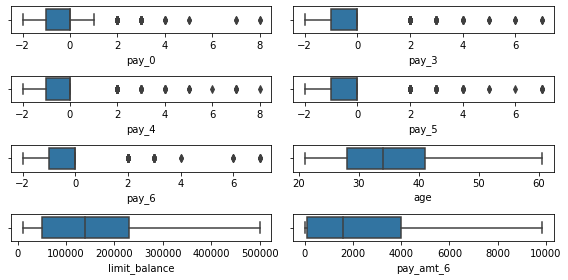

In [143]:
# Boxploting every feature on X_train to see outlier (After Handling)
x = plt.figure(figsize=(8, 4))

for i, j in enumerate(X_train_t.columns):
    x.add_subplot(4, 2, i+1)
    sns.boxplot(X_train_t[j])
    x.tight_layout()
    
plt.tight_layout()

# 6. Model Definition

In [144]:
# Defining the model with default parameter to pipeline (steps : scale with minmax scaler -> fit with initilize model)

pipe1  = Pipeline([('scaler', MinMaxScaler()),
                   ('logreg', LogisticRegression())])
pipe2  = Pipeline([('scaler', MinMaxScaler()),
                   ('svc', SVC())])
pipe3  = Pipeline([('scaler', MinMaxScaler()),
                   ('dtree', DecisionTreeClassifier(random_state = 0))])
pipe4  = Pipeline([('scaler', MinMaxScaler()),
                   ('forest', RandomForestClassifier(random_state = 0))])
pipe5  = Pipeline([('scaler', MinMaxScaler()),
                   ('knn', KNeighborsClassifier())])
pipe6  = Pipeline([('scaler', MinMaxScaler()),
                   ('nbayes', GaussianNB())])
pipe7  = Pipeline([('scaler', MinMaxScaler()),
                   ('adaboost', AdaBoostClassifier(random_state = 0))])

# 7. Model Training

In [145]:
# Train All Models 

pipe1.fit(X_train_t, y_train)
pipe2.fit(X_train_t, y_train)
pipe3.fit(X_train_t, y_train)
pipe4.fit(X_train_t, y_train)
pipe5.fit(X_train_t, y_train)
pipe6.fit(X_train_t, y_train)
pipe7.fit(X_train_t, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('adaboost', AdaBoostClassifier(random_state=0))])

# 8. Model Evaluation

In [146]:
# Predict against Train-Set and Test-Set

y_pred_trainLR = pipe1.predict(X_train_t)
y_pred_testLR = pipe1.predict(X_test)
y_pred_trainSV = pipe2.predict(X_train_t)
y_pred_testSV = pipe2.predict(X_test)
y_pred_trainDT = pipe3.predict(X_train_t)
y_pred_testDT = pipe3.predict(X_test)
y_pred_trainRF = pipe4.predict(X_train_t)
y_pred_testRF = pipe4.predict(X_test)
y_pred_trainKNN = pipe5.predict(X_train_t)
y_pred_testKNN = pipe5.predict(X_test)
y_pred_trainNB = pipe6.predict(X_train_t) 
y_pred_testNB = pipe6.predict(X_test)
y_pred_trainADA = pipe7.predict(X_train_t) 
y_pred_testADA = pipe7.predict(X_test)

In [147]:
# initialize list of lists accuracy scores
dfacc_raw = [['Logistic Regression', accuracy_score(y_train,y_pred_trainLR), accuracy_score(y_test,y_pred_testLR)],
         ['SVM', accuracy_score(y_train,y_pred_trainSV), accuracy_score(y_test,y_pred_testSV)],
         ['Decission Tree', accuracy_score(y_train,y_pred_trainDT), accuracy_score(y_test,y_pred_testDT)],
         ['Random Forest', accuracy_score(y_train,y_pred_trainRF), accuracy_score(y_test,y_pred_testRF)],
         ['K-Nearest Neighbor', accuracy_score(y_train,y_pred_trainKNN), accuracy_score(y_test,y_pred_testKNN)],
         ['Naive Bayes', accuracy_score(y_train,y_pred_trainNB), accuracy_score(y_test,y_pred_testNB)],
         ['Ada Boosting', accuracy_score(y_train,y_pred_trainADA), accuracy_score(y_test,y_pred_testADA)]]

# Create the pandas DataFrame
dfacc = pd.DataFrame(dfacc_raw, columns=['Model', 'Acc Score Train', 'Acc Score Test'])
 
# print dataframe of accuracy scores all models
dfacc

,Model,Acc Score Train,Acc Score Test
0,Logistic Regression,0.830372,0.796954
1,SVM,0.842217,0.805415
2,Decission Tree,0.995770,0.732657
3,Random Forest,0.995770,0.808799
4,K-Nearest Neighbor,0.854061,0.807107
5,Naive Bayes,0.824027,0.791878
6,Ada Boosting,0.845178,0.812183


In [148]:
# All Models Classification report for train and test set
print("1. LogReg Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainLR))
print("Test Set:\n", classification_report(y_test,y_pred_testLR))
print("*"*55)
print("2. SVM Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainSV))
print("Test Set:\n", classification_report(y_test,y_pred_testSV))
print("*"*55)
print("3. Decission Tree Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainDT))
print("Test Set:\n", classification_report(y_test,y_pred_testDT))
print("*"*55)
print("4. Random Forest Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainRF))
print("Test Set:\n", classification_report(y_test,y_pred_testRF))
print("*"*55)
print("5. K-Nearest Neighbor Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainKNN))
print("Test Set:\n", classification_report(y_test,y_pred_testKNN))
print("*"*55)
print("6. Naive Bayes Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainNB))
print("Test Set:\n", classification_report(y_test,y_pred_testNB))
print("*"*55)
print("7. Ada Boosting Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainADA))
print("Test Set:\n", classification_report(y_test,y_pred_testADA))
print("*"*55)


1. LogReg Model Classification Report
Train Set:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1860
           1       0.79      0.28      0.41       504

    accuracy                           0.83      2364
   macro avg       0.81      0.63      0.66      2364
weighted avg       0.82      0.83      0.80      2364

Test Set:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       462
           1       0.60      0.20      0.30       129

    accuracy                           0.80       591
   macro avg       0.71      0.58      0.59       591
weighted avg       0.77      0.80      0.75       591

*******************************************************
2. SVM Model Classification Report
Train Set:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1860
           1       0.79      0.36      0.49       504

    accuracy      

In [149]:
# initialize list of lists roc-auc scores
dfrocauc_raw = [['Logistic Regression', roc_auc_score(y_train,y_pred_trainLR), roc_auc_score(y_test,y_pred_testLR)],
         ['SVM', roc_auc_score(y_train,y_pred_trainSV), roc_auc_score(y_test,y_pred_testSV)],
         ['Decission Tree', roc_auc_score(y_train,y_pred_trainDT), roc_auc_score(y_test,y_pred_testDT)],
         ['Random Forest', roc_auc_score(y_train,y_pred_trainRF), roc_auc_score(y_test,y_pred_testRF)],
         ['K-Nearest Neighbor', roc_auc_score(y_train,y_pred_trainKNN), roc_auc_score(y_test,y_pred_testKNN)],
         ['Naive Bayes', roc_auc_score(y_train,y_pred_trainNB), roc_auc_score(y_test,y_pred_testNB)],
         ['Ada Boosting', roc_auc_score(y_train,y_pred_trainADA), roc_auc_score(y_test,y_pred_testADA)]]

# Create the pandas DataFrame
dfrocauc = pd.DataFrame(dfrocauc_raw, columns=['Model', 'ROC-AUC Score Train', 'ROC-AUC Score Test'])
 
# print dataframe of ROC-AUC scores all models
dfrocauc

,Model,ROC-AUC Score Train,ROC-AUC Score Test
0,Logistic Regression,0.628943,0.582377
1,SVM,0.665399,0.601757
2,Decission Tree,0.990803,0.591538
3,Random Forest,0.990803,0.634652
4,K-Nearest Neighbor,0.704749,0.619601
5,Naive Bayes,0.684217,0.621036
6,Ada Boosting,0.694041,0.639610


We calculate Accuracy, Classification report and ROC-AUC scores of all models above only with their default parameters. Now we will use `croos_val_score` to calculate accuracy *mean* and *std* of all models to find the best algorithm/model, then we will tuning the algorithm (best algorithm by cross validation score) parameter (*Hyperparameter tuning*) with *gridsearch* to find the *best parameter* of our choosen algorithm, then we will compare the algorithm with default parameter and the algorithm with its best parameter.

In [150]:
# initialize list of lists cross validation scores
dfcrsval_raw = [['Logistic Regression', cross_val_score(pipe1, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe1, X_train_t, y_train, cv=5).std()],
         ['SVM', cross_val_score(pipe2, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe2, X_train_t, y_train, cv=5).std()],
         ['Decission Tree', cross_val_score(pipe3, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe3, X_train_t, y_train, cv=5).std()],
         ['Random Forest', cross_val_score(pipe4, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe4, X_train_t, y_train, cv=5).std()],
         ['K-Nearest Neighbor', cross_val_score(pipe5, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe5, X_train_t, y_train, cv=5).std()],
         ['Naive Bayes', cross_val_score(pipe6, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe6, X_train_t, y_train, cv=5).std()],
         ['Ada Boosting', cross_val_score(pipe7, X_train_t, y_train, cv=5).mean(), cross_val_score(pipe7, X_train_t, y_train, cv=5).std()]]

# Create the pandas DataFrame
dfcrsval = pd.DataFrame(dfcrsval_raw, columns=['Model', 'Cross-Val Score', 'Std'])
 
# print dataframe of ROC-AUC scores all models
dfcrsval

,Model,Cross-Val Score,Std
0,Logistic Regression,0.826565,0.003541
1,SVM,0.833331,0.005948
2,Decission Tree,0.745746,0.033502
3,Random Forest,0.820215,0.016806
4,K-Nearest Neighbor,0.821485,0.015390
5,Naive Bayes,0.824032,0.014681
6,Ada Boosting,0.839672,0.013147


Based on cross_val_score table for all models above, it can be seen that Ada Boosting has the highest cross validation score with 0.01 std.

In [151]:
# Hyperparameter Tuning for the best algorithm

parameters = {
    'adaboost__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'adaboost__learning_rate': [(x) for x in np.arange(0.1, 2.1, 0.1)],
    'adaboost__algorithm': ['SAMME', 'SAMME.R']
}

In [152]:
# Search for the best param

grid_search = GridSearchCV(pipe7, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_t, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'adaboost__algorithm': ['SAMME', 'SAMME.R'],
                         'adaboost__learning_rate': [0.1, 0.2,
                                                     0.30000000000000004, 0.4,
                                                     0.5, 0.6,
                                                     0.7000000000000001, 0.8,
                                                     0.9, 1.0, 1.1,
                                                     1.2000000000000002,
                                                     1.3000000000000003,
                                                     1.4000000000000001,
                                                     1.5000000000000002, 1.6,
                                                     1.7000000000000002,
                                                     1.8000000000000003,
                                                     1.9000000000000001, 2.0],
                         'adaboost__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                    11, 12, 20]})

In [153]:
# Print best param and its best score

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'adaboost__algorithm': 'SAMME', 'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 11}
Best cross-validation score: 0.84


In [154]:
# Training adaboost models with its best param by gridsearch

pipe7_bestparam  = Pipeline([('scaler', MinMaxScaler()),
                   ('adaboost', AdaBoostClassifier(n_estimators = 12, learning_rate = 1.0, algorithm = 'SAMME', random_state = 0))])
pipe7_bestparam.fit(X_train_t, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('adaboost',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=12,
                                    random_state=0))])

In [155]:
# comparing accuracy score adaboost with default param and adaboost with best param

# predict against train and test set
y_pred_trainADA_bp = pipe7_bestparam.predict(X_train_t)
y_pred_testADA_bp = pipe7_bestparam.predict(X_test)

# initialize list of lists adaboost accuracy scores
dfada_raw = [['Ada Boosting', accuracy_score(y_train,y_pred_trainADA), accuracy_score(y_test,y_pred_testADA)],
         ['Ada Boosting with Best Param', accuracy_score(y_train,y_pred_trainADA_bp), accuracy_score(y_test,y_pred_testADA_bp)]]

# Create the pandas DataFrame
dfada = pd.DataFrame(dfada_raw, columns=['Model', 'Acc Score Train', 'Acc Score Test'])
 
# print dataframe of adaboost accuracy scores
dfada

,Model,Acc Score Train,Acc Score Test
0,Ada Boosting,0.845178,0.812183
1,Ada Boosting with Best Param,0.843063,0.812183


In [156]:
# Ada Boosting classification report comparison
print("Ada Boosting (Default param) Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainADA))
print("Test Set:\n", classification_report(y_test,y_pred_testADA))
print("*"*55)
print("Ada Boosting (Best param) Model Classification Report")
print("Train Set:\n", classification_report(y_train,y_pred_trainADA_bp))
print("Test Set:\n", classification_report(y_test,y_pred_testADA_bp))
print("*"*55)

Ada Boosting (Default param) Model Classification Report
Train Set:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1860
           1       0.73      0.43      0.54       504

    accuracy                           0.85      2364
   macro avg       0.80      0.69      0.72      2364
weighted avg       0.83      0.85      0.83      2364

Test Set:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       462
           1       0.63      0.33      0.44       129

    accuracy                           0.81       591
   macro avg       0.73      0.64      0.66       591
weighted avg       0.79      0.81      0.79       591

*******************************************************
Ada Boosting (Best param) Model Classification Report
Train Set:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1860
           1       0.74      0.41  

In [157]:
# comparing ROC-AUC score adaboost with default param and adaboost with best param

# initialize list of lists roc-auc scores
dfrocaucada_raw = [['Ada Boosting', roc_auc_score(y_train,y_pred_trainADA), roc_auc_score(y_test,y_pred_testADA)],
         ['Ada Boosting with Best Param', roc_auc_score(y_train,y_pred_trainADA_bp), roc_auc_score(y_test,y_pred_testADA_bp)]]

# Create the pandas DataFrame
dfrocaucada = pd.DataFrame(dfrocaucada_raw, columns=['Model', 'ROC-AUC Score Train', 'ROC-AUC Score Test'])
 
# print dataframe of ROC-AUC scores all models
dfrocaucada

,Model,ROC-AUC Score Train,ROC-AUC Score Test
0,Ada Boosting,0.694041,0.63961
1,Ada Boosting with Best Param,0.684741,0.63961


# 9. Model Inference

In [158]:
# Display Inference-Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,2,1,2,25,-1,-1,2,-1,-1,...,10610,0,0,5000,200,10610,0,0,0,0
1,180000,2,1,1,27,0,0,0,0,0,...,161664,164873,168344,5539,5741,5852,5881,7607,6135,0
2,170000,1,2,2,31,0,0,0,0,0,...,87399,74761,67855,46000,10002,3046,5000,0,10000,0
3,50000,2,2,1,23,0,0,0,0,0,...,28937,29119,29334,2000,1500,1432,1004,1035,1178,0
4,20000,2,1,2,22,1,2,2,0,0,...,11395,11927,9186,1100,0,289,594,0,50,0
5,40000,1,2,2,27,1,3,2,0,0,...,38464,38569,70659,0,7,2500,1500,1500,2976,1
6,100000,2,3,2,50,0,0,2,0,0,...,89994,89681,89849,7500,0,5001,3390,4000,10000,0
7,80000,2,1,1,37,-1,-1,-1,-1,-1,...,10056,317,728,286,14255,10071,317,728,16312,0
8,20000,1,2,2,23,0,-1,-1,-1,0,...,18628,19324,19208,6000,597,21722,1000,697,860,0
9,40000,2,2,2,23,-1,2,-1,-1,0,...,26370,24572,24918,0,326,26370,886,1075,830,1


In [159]:
# Feature Selection for inference data

data_inf_train = data_inf[['pay_0', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'age', 'limit_balance', 'pay_amt_6']]

In [160]:
# Predicting

y_pred_infLR = pipe1.predict(data_inf_train)
y_pred_infSV = pipe2.predict(data_inf_train)
y_pred_infDT = pipe3.predict(data_inf_train)
y_pred_infRF = pipe4.predict(data_inf_train)
y_pred_infKNN = pipe5.predict(data_inf_train)
y_pred_infNB = pipe6.predict(data_inf_train)
y_pred_infADA = pipe7.predict(data_inf_train)
y_pred_infADA_bp = pipe7_bestparam.predict(data_inf_train)

In [161]:
# Concate between Inference-Set and default_payments's Prediction

data_inf_final = pd.concat([data_inf[['pay_0', 'age', 'pay_2', 'limit_balance', 'pay_amt_6', 'default_payment_next_month']], 
                            pd.DataFrame(y_pred_infLR, columns=['Default Payment - LOGREGPrediction']), 
                            pd.DataFrame(y_pred_infSV, columns=['Default Payment - SVMPrediction']),
                            pd.DataFrame(y_pred_infDT, columns=['Default Payment - DecTreePrediction']),
                            pd.DataFrame(y_pred_infRF, columns=['Default Payment - RanForestPrediction']),
                            pd.DataFrame(y_pred_infKNN, columns=['Default Payment - KNNPrediction']),
                            pd.DataFrame(y_pred_infNB, columns=['Default Payment - NaiveBayPrediction']),
                            pd.DataFrame(y_pred_infADA, columns=['Default Payment - AdaBoostPrediction']),
                            pd.DataFrame(y_pred_infADA_bp, columns=['Default Payment - AdaBoostwithBPPrediction'])], 
                            axis=1)
data_inf_final

,pay_0,age,pay_2,limit_balance,pay_amt_6,default_payment_next_month,Default Payment - LOGREGPrediction,Default Payment - SVMPrediction,Default Payment - DecTreePrediction,Default Payment - RanForestPrediction,Default Payment - KNNPrediction,Default Payment - NaiveBayPrediction,Default Payment - AdaBoostPrediction,Default Payment - AdaBoostwithBPPrediction
0,-1,25,-1,50000,0,0,0,0,0,0,0,0,0,0
1,0,27,0,180000,6135,0,0,0,1,0,0,0,0,0
2,0,31,0,170000,10000,0,0,0,0,0,0,0,0,0
3,0,23,0,50000,1178,0,0,0,0,0,0,0,0,0
4,1,22,2,20000,50,0,0,0,1,0,0,1,0,0
5,1,27,3,40000,2976,1,0,0,0,0,0,1,0,0
6,0,50,0,100000,10000,0,0,0,1,0,1,0,0,0
7,-1,37,-1,80000,16312,0,0,0,0,0,0,0,0,0
8,0,23,-1,20000,860,0,0,0,0,0,0,0,0,0
9,-1,23,2,40000,830,1,0,0,0,0,0,0,0,0


# 10. Conclusion

Dataset overview :

In this mini research classification model we used `Credit Card Default` dataset on `BigQuery Public Dataset`. Our goal is to constructing classification model to predict the outcome :  **Did the costumer default or not?**

Deskripsi variabel dalam dataset :


| Name | Description |
| --- | --- |
| ID | 	ID of each client |
| LIMIT_BAL | Amount of given credit in NT dollars (includes individual and family/supplementary credit) |
| SEX | Gender (1=male, 2=female) |
| EDUCATION | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) |
| MARRIAGE | Marital status (1=married, 2=single, 3=others) |
| AGE | Age in years |
| PAY_0 | Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) |
| PAY_2 | Repayment status in August, 2005 (scale same as above) |
| PAY_3 | Repayment status in July, 2005 (scale same as above) |
| PAY_4 | Repayment status in June, 2005 (scale same as above) |
| PAY_5 | Repayment status in May, 2005 (scale same as above) |
| PAY_6 | Repayment status in April, 2005 (scale same as above) |
| BILL_AMT1 | Amount of bill statement in September, 2005 (NT dollar) |
| BILL_AMT2 | Amount of bill statement in August, 2005 (NT dollar) |
| BILL_AMT3 | Amount of bill statement in July, 2005 (NT dollar) |
| BILL_AMT4 | Amount of bill statement in June, 2005 (NT dollar) |
| BILL_AMT5 | Amount of bill statement in May, 2005 (NT dollar) |
| BILL_AMT6 | Amount of bill statement in April, 2005 (NT dollar) |
| PAY_AMT1 | Amount of previous payment in September, 2005 (NT dollar) |
| PAY_AMT2 | Amount of previous payment in August, 2005 (NT dollar) |
| PAY_AMT3 | Amount of previous payment in July, 2005 (NT dollar) |
| PAY_AMT4 | Amount of previous payment in June, 2005 (NT dollar) |
| PAY_AMT5 | Amount of previous payment in May, 2005 (NT dollar) |
| PAY_AMT6 | Amount of previous payment in April, 2005 (NT dollar) |
| default.payment.next.month | Default payment (1=yes, 0=no) |



Exploratory Data Analysis : 

There are 2965 rows and 24 columns in the data. By data.info(), as we can see that there are 2965 RangeIndex in the data. For the data type, we only have integer (int64). By value_counts for a specific feature, it can be seen that `no default` payment class of costumer is more than quadrupled compared to `default` class of costumer, University grads are the most credit card (cc) holder, so many cc holder are single, and there are so many cc holder female than male.

Displotting all features shows us that all features are distributed non-normally. However, these features are divided into two categories that are numerical features and categorical features in numeric form. If we refer to this [references](http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html), then the numerical features are `limit_balance`, `age`, `bill_amt_1` to `bill_amt_6`, `pay_amt_1` to `pay_amt_6` and the rest are categorical features. 

Heatmap correlation between `default_payment_next_month` and other features shows that `pay_0` to `pay_6` are significantly correlating to `default_payment_next_month` feature.

Interestingly, we found out that the higher the limit balance of cc holder, the higher the probability of they will not default in next month payment and the minimum of limit balance that holder should have in order to not default next month payment is 400000.

---
Preprocessing Data :

To choose the best features for our model we did selection by feature importance using random forest classifier, and we got that feature 5, feature 4, feature 6, feature 0, and feature 22 which are `pay_0`, `age`, `pay_2`, `limit_balanc`, and `pay_amt_6` are the most important features by ***Features importances using MDI measurement***. 

However, when we checked the correlation between top important features, the correlation between `pay_0`, and `pay_2` is relatively high, then we only used `pay_0`. Therefore, we merged the top important features using MDI measurement with the most correlating features to `default_payment_next_month`, and then we have `pay_0`, `pay_3`, `pay_4`, `pay_5`, `pay_6`, `age`, `limit_balance`, and `pay_amt_6` as our selected features for modelling.

All variables(columns) // selected features in training set are distributed non-normally. However, for this *Classification Credit Card Default* case, we will assume every value in each variable are natural values because all values are considerably important especially for payments amount, age range, and limit balance (numerical variables) for predicting default payment next month. Therefore, we will handling the outliers with ***capping method***. 

We are not handling outliers on `pay_0` to `pay_5` var, they are categorical variables.

---
Defining Model :

After handling missing values and outliers, then we used `Pipeline` method to define the models, with steps order is we scale the data first using MinMaxScaler(), then fit the models.

---
Evaluating Model :

By classification report all models, we will only discuss about recall value. why? interestingly, recall value for each class on all models are significantly different and we just want to know about ratio of default payment (True positive for class 1) to the sum of true predicted and not predicted default payment (True positive and False Negative for class 1).

Anyway, "*Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.*" 


Recall description on all models :


| Model | Recall train set (class 0) | Recall train set (class 1) | Recall test set (class 0)| Recall test set (class 1)|
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.98 | 0.28 | 0.96 | 0.20 |
| SVM | 0.97 | 0.36 | 0.96 | 0.24 |
| Decission Tree | 1.00 | 0.98 | 0.84 | 0.34 |
| Random Forest | 1.00 | 0.98 | 0.94 | 0.33 |
| K-Nearest Neighbor | 0.97 | 0.44 | 0.95 | 0.29 |
| Naive Bayes | 0.93 | 0.44 | 0.92 | 0.32 |
| Ada Boosting | 0.96 | 0.43 | 0.95 | 0.33 |



on our result by evaluating all models, we can see that recall on train and test set are significantly different for each class except for Decission Tree and Random Forest algorithm. This significance is caused by the imbalance class data on target ($y$). We have more `no default` class (initialize as `0`) than `default` class (initialize as `1`). 

But it is good to have high recall value on class `0` if credit card issuer (bank) just want to know and to make sure that most of their customer will not default for the next month payment. However, if the card issuer wants to know and to make sure that customers next month payment will default, then it is good to consider for the recall value of class `1`. 

For further model improvement, perhaps it is good to rebalancing the data, especially for the data classes on target variable ($y$). This rebalancing could be done by using resampling method (with SMOTE for example) or by collecting data original from the card issuer with more balance data classes on target variable ($y$).

---
Searching for the best algorithm with best parameter :

By accuracy all models, if we compare one by one, then ***Decission tree*** and ***Random Forest*** have the highest score on train set, and ***AdaBoost*** on test set. By ROC-AUC score, ***Random Forest*** has the highest score on train set, and ***AdaBoost*** on test set.


However, all models accuracy and ROC-AUC score are higher on train set than test set, but the accuracy scores on test set is around 80% which is still good, except for Dec.Tree model accuracy that is just 73% (while its accuracy score is 98%). It leads us to conclude that some models are ***overfitting*** (`in our result that are Dec. Tree and Random Forest model`). 

To avoid this, we used `croos_val_score` to calculate accuracy *mean* and *std* of all models to find the best algorithm/model, and as it can be seen that ***AdaBoost*** has the highest `croos_val_score`. 

Then we tuned the ***AdaBoost*** algorithm parameter (*Hyperparameter tuning*) with `gridsearch` to find its *best parameter* and that is 
<center>

`{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 12}`
</center>

with the best cross-validation score is $0.84$. 

Next we compare the AdaBoost algorithm with default parameter and the algorithm with its best parameter.

After comparing, AdaBoost with default parameter is slightly better compared to the AdaBoost algorithm with hyperparameter tuning, but the different is just around 0.01 for ROC-AUC score and almost the same for accuracy score. It leads us to conclude that sometimes base model could give better result from the model with hyperparameter tuning, or vice versa.


---

# *Conceptual Problems*

1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari `pruning` pada Tree model?
3. Bagaimana cara memilih `K` yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!
5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score`!

### 1. Criterion pada Decision Tree Model

Criterion adalah fungsi untuk mengukur quality dari sebuah split. Berdasarkan deokumentasi [sklearn-decissiontree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), criterion dalam decission tree ada tiga jenis yaitu `gini` untuk *Gini impurity* dan `log-loss` atau `entropy` untuk *Shannon information gain*. Untuk criterion `gini`, algoritma akan menghitung *purity* dari `split` untuk setiap `node` dalam decission tree. Rumus Gini untuk node-$i$ adalah :

<center>

$G_i = 1 - \sum_{k = 1}^{n}{{P_i, _k}^2}$ <br>

dengan ${P_i, _k}$ adalaha rasio class $k$ features terhadap semua training features untuk node-$i$. Nilai $Gi$ memiliki range antara $0$ dan $0.5$. Sebuah node dikatakan *pure* ketika $Gi$-nya bernilai $0$ atau semua feature memiliki class yang sama.

### 2. Pruning pada Decision Tree Model

Dalam *decission tree*, biasanya kelemahan model ini adalah `overfitting` yaitu accuracy tinggi di train set tapi rendah di test set. Hal ini terjadi karena banyaknya `branch` dan `layer` dalam model tree yang dihasilkan. Nah, untuk mengatasi hal ini, dilakukanlah ***pruning*** yaitu menghilangkan *subtree redundant* dan *unuseful split* serta menggantinya dengan sebuah *leaf node*. *Removal method*-nya bisa menggunakan **Gini impurity** atau **Information Gain**. 

Saat pembentukan decision tree, beberapa node merupakan outlier maupun hasil dari noise data. Penerapan pruning pada decision tree, dapat mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data. Oleh sebab itu pemilihan algoritma pruning yang tepat perlu dilakukan untuk mendapat hasil klasifikasi yang maksimal.

### 3. `K` optimal untuk KNN

Pemilihan `k` optimal untuk kNN bisa dengan beberapa cara:

- Dengan melakukan **hyperparameter tuning** dan memvalidasi `k` yang menghasilkan *accuracy* tinggi dengan **cross validation score**.<br>
- Menggunakan **Elbow method**, dalam metode ini dicari `k` optimal untuk k-means clustering lalu `k` optimal itu digunakan untuk kNN.
- Menggunakan metode **Schwarz Criterion**, pemilihan `k` dengan metode Schwarz Criterion dilakukan dengan *meminimize* : distortion + $\lambda D klog(n)$.  <br>Dimana $D$ = dimension of problem, $k$ = number of clusters, $N$ = no. of data points, $λ$ = parameter to be specified. [*/sources*](https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification)
- Dan metode lainnya yang mungkin bisa diketahui dengan ekplorasi lebih lanjut.

### 4. Cross Validation Score

Cross Validation adalah resampling proses yang biasa digunakan untuk mengevaluasi model machine learning untuk sample data yang terbatas atau *limited sample data*. Biasanya disebut `k-fold` `cross validation`. Proses yang dimaksud adalah :
```python
"Membagi dataset secara acak / random ke dalam k-groups / k-folds dengan size yang sama. Jika group data pertama dijadikan sebagai validation set, maka dilakukan fit algorithm atau model di group data selain group data pertama (remaining k-1 folds)." 
```
Cross Validation Score adalah score accuracy yang dihasilkan di setiap foldnya. Jadi kalo kita menentukan `k` $= 5$, maka akan cross_val_score akan menghasilkan $5$ score accuracy, dan score accuracy sebanyak `k` ini biasanya digeneralisasi dengan mencari rata-rata semua score dan standar deviasinya.

### 5. Accuracy, Precission, Recall dan F1-Score

Jika :
- TN / True Negative: Ketika class negative terprediksi negative
- TP / True Positive: ketika class positive terprediksi positive
- FN / False Negative: ketika class positive tapi terprediksi negative
- FP / False Positive: ketika class negative tapi terprediksi positive

Maka :
- Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.<br>
$Accuracy = (TP + TN) / (TP + FP + FN + TN)$

- Precission merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. <br>
$Precission = (TP) / (TP+FP)$

- Recall (Sensitifitas) meruoakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.<br>
$Recall = (TP) / (TP + FN)$

- F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan.<br>
$F1-Score = 2(Recall*Precission) / (Recall + Precission)$


